In [1]:
#imports
import numpy as np
import pandas as pd
import logging
log = logging.getLogger(__name__)
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import signal, stats #filters
import scipy.fftpack #fft



#        ABR DATA         #


In [2]:
#Reproducibility
np.random.seed(1)

#axis1 = mV
#axis2 = L/R
#axis3 = db
#axis4 = Hz
#axis5 = rat
freqs = [0, 2000, 4000, 8000, 16000, 24000, 32000]
dbs = [90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25]

df_all = pd.DataFrame({'ratname':[],'frequency':[],'dB':[],'L/R':[],'ABR':[], 'label':[]})
for rat in ["R144863_090921", "R144883_091321", "R144884_091321"]:
   
    i = 0
    for f in (freqs):
        i = str(i)
        folder = "data_text_files/"
        path = folder + rat + "/"
        file = path + i +'.txt'
        fh = open(file, "r")
        j = 0
        while True:
            if fh.readline().startswith('Data Pnt:'):
                break
            j += 1
        df = pd.io.parsers.read_csv(file, skiprows=j)

        #Keeping only the column containing the average 
        df = df[[c for c in df.columns if c.startswith('Average(uV):')]]
        df.columns = np.arange(len(df.columns))

       
        # # check index for number of left and right entries????
        db = (pd.io.parsers.read_csv(file, skiprows = 7, header=None))[1:2].dropna(axis = 1)
        db1 = np.array(db)[:,1:].astype('int')

        d=0
        while True:
            if db1[:,d] >= 25:
                new_entry = {'ratname':rat,'frequency':f,'dB':db1[:,d],'L/R':'L','ABR':df.loc[:,d].to_numpy()}
                df_all = df_all.append(new_entry, ignore_index=True)
                d += 1
            if (db1[:,d] - db1[:,d+1]) < 0:
                d += 1
                break
            

        while True:
            if db1[:,d] >= 25:
                new_entry = {'ratname':rat,'frequency':f,'dB':db1[:,d],'L/R':'R','ABR':df.loc[:,d].to_numpy()}
                df_all = df_all.append(new_entry, ignore_index=True)
            d += 1
            if db1[:,d] < 25:
                break

        samples = len(df)
        fs = 25.00
        N = fs /2
        n = np.linspace(0, N, num=samples) 
        

C:\Users\10578\AppData\Local\Temp\ipykernel_20164\1341817831.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(new_entry, ignore_index=True)
C:\Users\10578\AppData\Local\Temp\ipykernel_20164\1341817831.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(new_entry, ignore_index=True)
C:\Users\10578\AppData\Local\Temp\ipykernel_20164\1341817831.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(new_entry, ignore_index=True)
C:\Users\10578\AppData\Local\Temp\ipykernel_20164\1341817831.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(new_en

<function matplotlib.pyplot.show(close=None, block=None)>

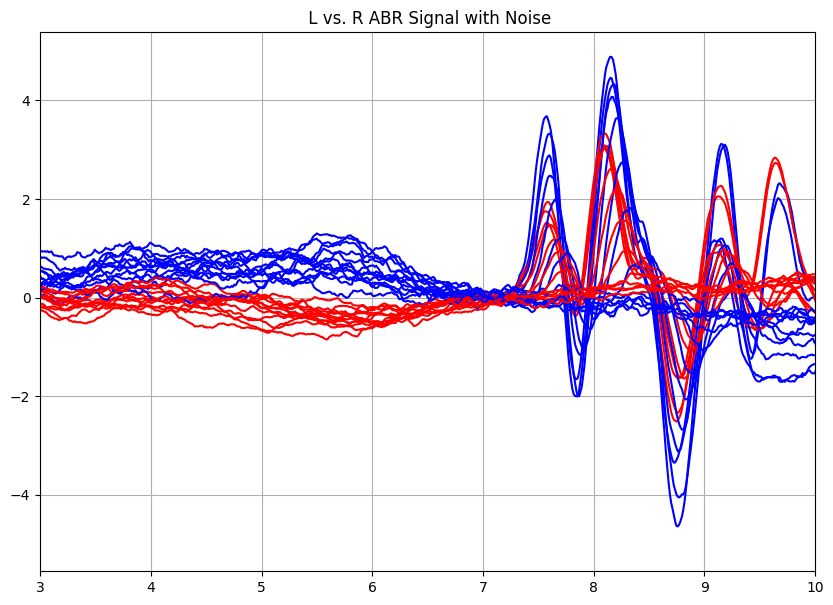

In [3]:
left = (df_all[df_all['L/R'] == "L"]["ABR"])
right = (df_all[df_all['L/R'] == "R"]["ABR"])



fig, ax = plt.subplots(1,1, figsize=(10,7))
i = 0
c = 0

plt.title(" L vs. R ABR Signal with Noise")
plt.grid()
plt.xlim(3,10)
plt.subplot(111)
for i in range(13):
    plt.plot(n, left[c+i], color = 'blue')
    plt.plot(n, right[c+14+i], color = 'red')
plt.show
    






In [4]:
#tested to ensure data drame accurately represents text files

df_all[518:533]

,ratname,frequency,dB,L/R,ABR,label
518,R144884_091321,16000.0,[90],R,"[-0.0682, -0.0609, -0.0535, -0.0667, -0.0617, ...",NaN
519,R144884_091321,16000.0,[85],R,"[-0.0892, -0.101, -0.1088, -0.1115, -0.0947, -...",NaN
520,R144884_091321,16000.0,[80],R,"[-0.0981, -0.0882, -0.0898, -0.0897, -0.0975, ...",NaN
521,R144884_091321,16000.0,[75],R,"[-0.392, -0.4034, -0.3748, -0.3534, -0.3307, -...",NaN
522,R144884_091321,16000.0,[70],R,"[0.1833, 0.1699, 0.1353, 0.1312, 0.1115, 0.091...",NaN
523,R144884_091321,16000.0,[65],R,"[-0.2619, -0.2646, -0.2661, -0.2367, -0.2295, ...",NaN
524,R144884_091321,16000.0,[60],R,"[-0.0532, -0.0653, -0.0683, -0.0693, -0.0862, ...",NaN
525,R144884_091321,16000.0,[55],R,"[0.2088, 0.2186, 0.2396, 0.2766, 0.3037, 0.321...",NaN
526,R144884_091321,16000.0,[50],R,"[0.1591, 0.1436, 0.1278, 0.1167, 0.1116, 0.106...",NaN
527,R144884_091321,16000.0,[45],R,"[-0.122, -0.1224, -0.1042, -0.081, -0.0631, -0...",NaN


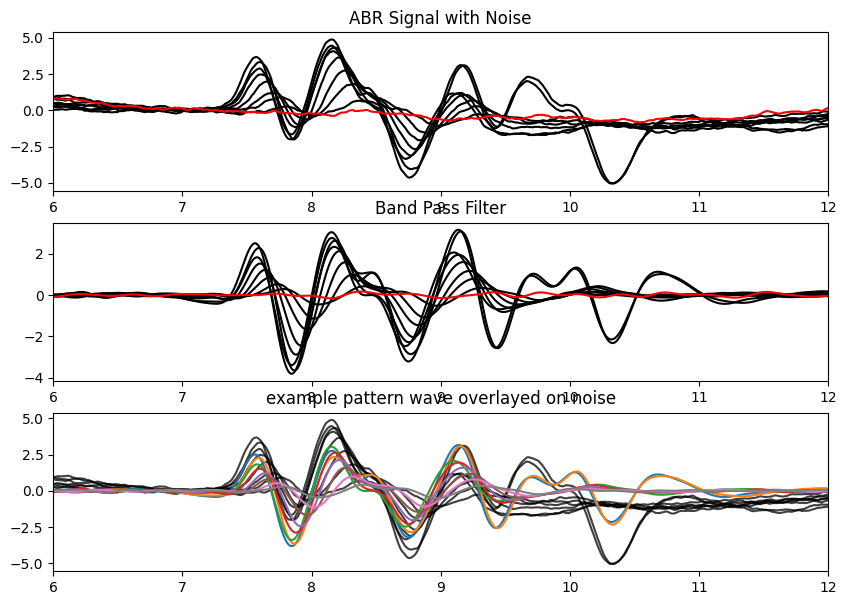

In [5]:
N = 1024
T = 1.0 / fs
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


#create figure
fig, ax = plt.subplots(3, 1, figsize=(10,7))

i = 0
r = 0
for r in range(len(rat)):
    for i in range(28):
        data = df_all.loc[i]["ABR"]


        # plt.subplot(411)
        # plt.plot(n, data)
        # plt.title("ABR Signal with Noise")
        # plt.grid()
       

        # #fft
        # yf = scipy.fftpack.fft(data)
        # plt.subplot(412)
        # plt.plot(xf, 2.0/N * np.abs(yf[0:samples//2]))
        # plt.title("FFT")
        # plt.grid()
        # plt.xlim(0,1)

        #bandpass
        b, a = scipy.signal.butter(3, [.02, .09], 'band')
        filteredBandPass = scipy.signal.filtfilt(b, a, data)
        # # plt.subplot(413)
        # # plt.plot(n, filteredBandPass)
        # # plt.title("Band Pass Filter")
        # plt.margins(0, .05)


        #iterate
        i += 0
    r +=1



# #example abr wave form overlayed on noise
# j=0
threshold = 8

# #noise data
for j in range(14): 
    data = df_all.loc[j]["ABR"]

    plt.subplot(311)
    if j != threshold: 
        plt.plot(n, data, 'black')
    if j == threshold:
        plt.plot(n, data, 'red')
        break
    plt.title("ABR Signal with Noise")
    plt.grid()
    plt.xlim(6,12)


    plt.subplot(313)
    plt.plot(n, data, color = 'black', alpha = .75)
    plt.xlim(6,12)
    j +=1



#filtered data
j=0
for j in range(14): 
    data = df_all.loc[j]["ABR"]
    filteredBandPass = scipy.signal.filtfilt(b, a, data)

    plt.subplot(312)
    if j != threshold: 
        plt.plot(n, filteredBandPass, 'black')
    if j == threshold:
        plt.plot(n, filteredBandPass, 'red')
        break
    plt.title("Band Pass Filter")
    plt.margins(0, .05)
    plt.xlim(6,12)




    plt.subplot(313)
    plt.plot(n,filteredBandPass)
    plt.title("example pattern wave overlayed on noise")
    plt.xlim(6,12)
    j +=1


#show figure
plt.show()



wave one latency:
0.9652981427174971

wave one max peak:
1.9864


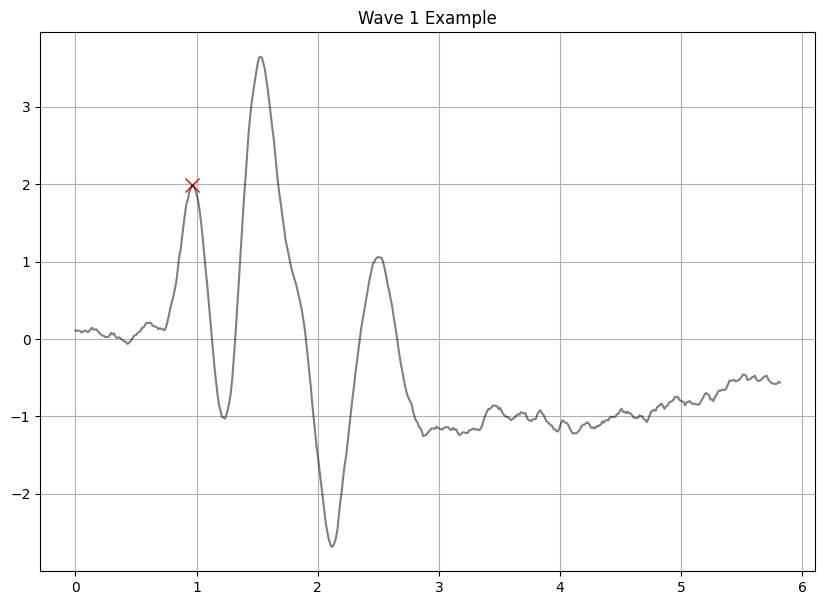

In [6]:
# # #tested to ensure data drame accurately represents text file labels for latency and peark

#*********** note sero position   ***********


z_pos = 548 -1
data = (df_all[0:33]['ABR'][4][z_pos:])

wave_one_peak = 626 #hand selected from data "n" sampled points
latency = (n[wave_one_peak] - n[z_pos])
point = (latency, data[wave_one_peak-z_pos])
x, y = point
print("wave one latency:")
print(x)
print(

)
print("wave one max peak:")
print(y)

fig, ax = plt.subplots(1, 1, figsize=(10,7))
plt.plot(x, y, marker="x", markersize=10, markeredgecolor="red")
plt.plot((n[z_pos:]-n[z_pos]), data, color = 'black', alpha = .5)
plt.title("Wave 1 Example")
plt.grid()
plt.show()


In [9]:
### Tune with Machine Learning?

# Note
FILTERED RESPONSE LOSES MAXIMUM PEAK AMPLITUDE DATA
https://swharden.com/blog/2020-09-23-signal-filtering-in-python/

In [7]:
labels = np.ones(len(df_all))

dbs = [90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25]
thresholds = [50, 50, 50, 50, 40, 40,40, 40, 35, 35, 25, 25, 20, 20, 
              45, 55, 45, 55, 40, 35, 40, 45, 40, 40, 20, 25, 30, 25,
               50, 45, 50, 50, 45, 45, 45, 45, 35, 40, 30, 30, 25, 20 ]

i = 0
for t in thresholds:
    for d in dbs:
        if d < t:
            labels[i] = 0
        i +=1
print(labels)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.

# Find the threshold point of ABR "wave 1" 
### Wave 1 is the first major peak of each waveform

### we will also want to the know the maximum (amplitude value) and latency (time value) of wave 1 for each wave
#The appearence or non appearence  of a significant peak 1 accross decreasing intesity (90->85--> .... --> 50 decibles) will help to determine the hearing threshold for the hearing test.

# Build a CNN for ABR Data Classification (3 classes)  - Pytorch


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as nnF
from torch.utils.data import DataLoader as torch_dataloader
from torch.utils.data import Dataset as torch_dataset
import torch.optim as optim

## Load data and create dataloaders

In [20]:
X = df_all["ABR"]
Y=  labels
X= X.values
X.shape


(588,)

In [11]:
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y
    def __len__(self):        
        return self.X.shape[0]
    def __getitem__(self, idx):        
        #we can use DatasetName[idx] to get a data point (x,y) with index idx
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.int64)
        x=x.reshape(1,-1)
        return x, y

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

In [22]:
dataset_train=MyDataset(X_train, Y_train)
dataset_val=MyDataset(X_val, Y_val)
dataset_test=MyDataset(X_test, Y_test)

In [23]:
loader_train = torch_dataloader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
loader_val = torch_dataloader(dataset_val, batch_size=128, shuffle=False, num_workers=0) 
loader_test = torch_dataloader(dataset_test, batch_size=128, shuffle=False, num_workers=0) 

## The Neural Network: CNN

In [60]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=30, 
                               kernel_size=5, stride=1, padding=2)        
        self.conv2 = nn.Conv1d(30,15,5,1,2)        
        self.conv3 = nn.Conv1d(15,5,5,1,2)       
        self.fc1 = nn.Linear(640, 50)
        self.fc2 = nn.Linear(50, 3)
        #self.norm3 = nn.BatchNorm1d(64)
        #self.norm4 = nn.BatchNorm1d(64)
        #self.norm5 = nn.BatchNorm1d(64)     
        self.max1=torch.nn.MaxPool1d(kernel_size=2,stride=2)
        self.max2=torch.nn.MaxPool1d(kernel_size=2,stride=2)
        self.max3=torch.nn.MaxPool1d(kernel_size=2,stride=2)
        
    def forward(self, x):
        print("x", x.shape)
        x1=nnF.relu(self.conv1(x))
        print("x1", x1.shape)
        x2=self.max1(x1)
        print("x2", x2.shape)
        x3=nnF.relu(self.conv2(x2))
        print("x3", x3.shape)
        x4=self.max2(x3)
        print("x4", x4.shape)  
        x5=nnF.relu(self.conv3(x4))
        print("x5", x5.shape)
        x6=self.max3(x5)
        print("x6", x6.shape)
        x7=x6.view(x6.shape[0], -1)
        print("x7", x7.shape)
        x8=nnF.relu(self.fc1(x7))
        print("x8", x8.shape)
        z=nnF.relu(self.fc2(x8))
        print(z.shape)
        y=nnF.softmax(z, dim=1)
        return z

In [61]:
#debug your network here
#make sure it works for one single input sample
model=Net()
x=torch.rand(1,1,1024) 
z=model(x)

x torch.Size([1, 1, 1024])
x1 torch.Size([1, 30, 1024])
x2 torch.Size([1, 30, 512])
x3 torch.Size([1, 15, 512])
x4 torch.Size([1, 15, 256])
x5 torch.Size([1, 5, 256])
x6 torch.Size([1, 5, 128])
x7 torch.Size([1, 640])
x8 torch.Size([1, 50])
torch.Size([1, 3])


In [62]:
def save_checkpoint(filename, model, optimizer, result, epoch):
    torch.save({'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'result':result},
               filename)
    print('saved:', filename)

In [63]:
def cal_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the standard classification accuracy
    M=confusion.copy().astype('float32')
    acc = M.diagonal().sum()/M.sum()    
    sens=np.zeros(M.shape[0])
    prec=np.zeros(M.shape[0]) 
    for n in range(0, M.shape[0]):
        TP=M[n,n]
        FN=np.sum(M[n,:])-TP
        FP=np.sum(M[:,n])-TP
        sens[n]=TP/(TP+FN)
        prec[n]=TP/(TP+FP)       
    return acc, sens, prec

## The function to train the model

In [64]:
def train(model, device, optimizer, dataloader, epoch):    
    model.train()#set model to training mode
    loss_train=0
    acc_train =0 
    sample_count=0
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()#clear grad of each parameter
        Z = model(X)#forward pass
        loss = nnF.cross_entropy(Z, Y)
        loss.backward()#backward pass
        optimizer.step()#update parameters
        loss_train+=loss.item()
        #do not need softmax
        Yp = Z.data.max(dim=1)[1]  # get the index of the max               
        acc_train+= torch.sum(Yp==Y).item()
        sample_count+=X.size(0)
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{:.0f}%]\tLoss: {:.6f}'.format(
                    epoch, 100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    #due to upsampling, len(dataloader.dataset) != sample_count
    #acc_train/=len(dataloader.dataset) 
    acc_train/=sample_count    
    return loss_train, acc_train

## The Function to test the model

In [65]:
def test(model, device, dataloader):
    model.eval()#set model to evaluation mode
    acc_test =0
    confusion=np.zeros((5,5))
    with torch.no_grad(): # tell Pytorch not to build graph in the with section
        for batch_idx, (X, Y) in enumerate(dataloader):
            X, Y = X.to(device), Y.to(device)
            Z = model(X)#forward pass
            #do not need softmax
            Yp = Z.data.max(dim=1)[1]  # get the index of the max 
            acc_test+= torch.sum(Yp==Y).item()
            for i in range(0, 3):
                for j in range(0, 3):
                    confusion[i,j]+=torch.sum((Y==i)&(Yp==j)).item()
    acc, sens, prec=cal_accuracy(confusion)
    return acc, (confusion, sens, prec)

## Create a model, and start the traning-validation-testing process

In [66]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=Net()
model.to(device)
x = dataset_train[0][0]
z = model(x.view(1, 1, 1024))

x torch.Size([1, 1, 1024])
x1 torch.Size([1, 30, 1024])
x2 torch.Size([1, 30, 512])
x3 torch.Size([1, 15, 512])
x4 torch.Size([1, 15, 256])
x5 torch.Size([1, 5, 256])
x6 torch.Size([1, 5, 128])
x7 torch.Size([1, 640])
x8 torch.Size([1, 50])
torch.Size([1, 3])


In [68]:
y_hat=nnF.softmax(z, dim=1)
y_hat

tensor([[0.3296, 0.3296, 0.3408]], grad_fn=<SoftmaxBackward0>)

use stochastic gradient descent as the optimization method

In [69]:
optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=1e-4)

In [70]:
loss_train_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

train/val/test over many epochs

In [71]:
for epoch in range(epoch_save+1, 100): #change 100 to a larger number if necessary
    #-------- training --------------------------------
    loss_train, acc_train =train(model, device, optimizer, loader_train, epoch)    
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    #-------- validation --------------------------------
    acc_val, other_val = test(model, device, loader_val)
    acc_val_list.append(acc_val)
    print('epoch', epoch, 'validation acc:', acc_val)
    #--------save model-------------------------
    result = (loss_train_list, acc_train_list, 
              acc_val_list, other_val)
    save_checkpoint('Pytorch_epoch'+str(epoch)+'.pt', model, optimizer, result, epoch)
    epoch_save=epoch

x torch.Size([128, 1, 1024])
x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
Train Epoch: 0 [0%]	Loss: 1.109746
x torch.Size([128, 1, 1024])
x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
x torch.Size([128, 1, 1024])
x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
x torch.Size([39, 1, 1024])
x1 torch.Size([39, 30, 1024])
x2 torch.Size([39, 30, 512])
x3 torch.Size([39, 15, 512])
x4 torch.

C:\Users\10578\AppData\Local\Temp\ipykernel_20164\3076453557.py:13: RuntimeWarning: invalid value encountered in float_scalars
  prec[n]=TP/(TP+FP)
C:\Users\10578\AppData\Local\Temp\ipykernel_20164\3076453557.py:12: RuntimeWarning: invalid value encountered in float_scalars
  sens[n]=TP/(TP+FN)


x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
Train Epoch: 1 [0%]	Loss: 1.036872
x torch.Size([128, 1, 1024])
x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
x torch.Size([128, 1, 1024])
x1 torch.Size([128, 30, 1024])
x2 torch.Size([128, 30, 512])
x3 torch.Size([128, 15, 512])
x4 torch.Size([128, 15, 256])
x5 torch.Size([128, 5, 256])
x6 torch.Size([128, 5, 128])
x7 torch.Size([128, 640])
x8 torch.Size([128, 50])
torch.Size([128, 3])
x torch.Size([39, 1, 1024])
x1 torch.Size([39, 30, 1024])
x2 torch.Size([39, 30, 512])
x3 torch.Size([39, 15, 512])
x4 torch.Size([39, 15, 256])
x5 torch.

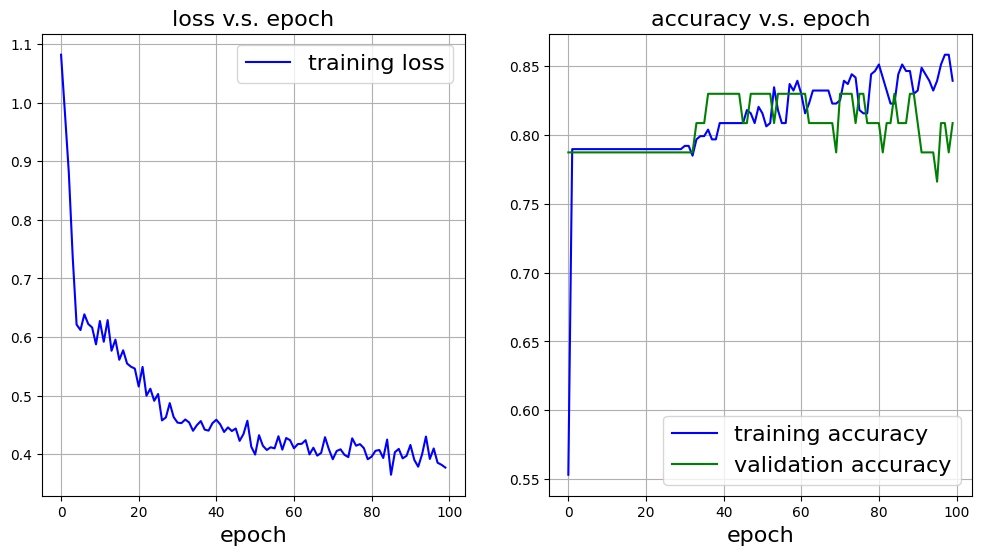

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title('loss v.s. epoch',fontsize=16)
ax[0].plot(loss_train_list, '-b', label='training loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].set_title('accuracy v.s. epoch',fontsize=16)
ax[1].plot(acc_train_list, '-b', label='training accuracy')
ax[1].plot(acc_val_list, '-g', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

load the best model

In [73]:
best_epoch=np.argmax(acc_val_list)
best_epoch

36

In [74]:
checkpoint=torch.load('ECG_MLP_Pytorch_epoch'+str(best_epoch)+'.pt')
model=Net()
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device);
model.eval();

In [75]:
acc, (confusion, sens, prec) = test(model, device, loader_test)
print('Sensitivity', sens)
print('Precision', prec)
print('Confusion \n', confusion)

x torch.Size([118, 1, 1024])
x1 torch.Size([118, 30, 1024])
x2 torch.Size([118, 30, 512])
x3 torch.Size([118, 15, 512])
x4 torch.Size([118, 15, 256])
x5 torch.Size([118, 5, 256])
x6 torch.Size([118, 5, 128])
x7 torch.Size([118, 640])
x8 torch.Size([118, 50])
torch.Size([118, 3])
Sensitivity [0.         0.99000001        nan        nan        nan]
Precision [0.         0.84615386        nan        nan        nan]
Confusion 
 [[ 0. 18.  0.  0.  0.]
 [ 1. 99.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


C:\Users\10578\AppData\Local\Temp\ipykernel_20164\3076453557.py:12: RuntimeWarning: invalid value encountered in float_scalars
  sens[n]=TP/(TP+FN)
C:\Users\10578\AppData\Local\Temp\ipykernel_20164\3076453557.py:13: RuntimeWarning: invalid value encountered in float_scalars
  prec[n]=TP/(TP+FP)


In [76]:
print('Accuracy (average)', acc)

Accuracy (average) 0.83898306
